# 1-1 손글씨를 분류해보자

목적: 0~9 사이의 손글씨 이미지를 보고 모델을 학습시킨다

# 1. 모듈 불러오기

In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# 2. 데이터 준비

In [50]:
load = load_digits()   # load_digits 데이터셋에 이름을 부여한다

## 3. 데이터의 정보 확인

- 전체적인 데이터를 직접 살펴보기
- 살펴본 데이터를 기반으로 감잡기
- 어떤 문제이고 어떤 학습 기법을 적용해야 하는지 생각해보기

In [51]:
print(load.keys())
# 데이터의 정보들을 확인한다

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])


In [52]:

print(dir(load))

# 우선 데이터셋에 어떤 변수와 메서드를 가지고 있는지 체크한다

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']


In [53]:
load.data[0]           
# 데이터의 0번째 줄을 봄으로써 어떤식으로 구성되어있는지 확인한다
# 숫자 이미지를 구분하는 것 이기  때문에 8x8로 64개인것을 추측 할수 있으며 각각의 값은 pixel값임을 추측할 수 있다 

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [54]:
print(load.target_names)


[0 1 2 3 4 5 6 7 8 9]


In [55]:
load_feature = load.feature_names
print(load_feature)

# 위에서 말했듯이 pixel값이 8x8로 되어있음을 확인 할 수있다

['pixel_0_0', 'pixel_0_1', 'pixel_0_2', 'pixel_0_3', 'pixel_0_4', 'pixel_0_5', 'pixel_0_6', 'pixel_0_7', 'pixel_1_0', 'pixel_1_1', 'pixel_1_2', 'pixel_1_3', 'pixel_1_4', 'pixel_1_5', 'pixel_1_6', 'pixel_1_7', 'pixel_2_0', 'pixel_2_1', 'pixel_2_2', 'pixel_2_3', 'pixel_2_4', 'pixel_2_5', 'pixel_2_6', 'pixel_2_7', 'pixel_3_0', 'pixel_3_1', 'pixel_3_2', 'pixel_3_3', 'pixel_3_4', 'pixel_3_5', 'pixel_3_6', 'pixel_3_7', 'pixel_4_0', 'pixel_4_1', 'pixel_4_2', 'pixel_4_3', 'pixel_4_4', 'pixel_4_5', 'pixel_4_6', 'pixel_4_7', 'pixel_5_0', 'pixel_5_1', 'pixel_5_2', 'pixel_5_3', 'pixel_5_4', 'pixel_5_5', 'pixel_5_6', 'pixel_5_7', 'pixel_6_0', 'pixel_6_1', 'pixel_6_2', 'pixel_6_3', 'pixel_6_4', 'pixel_6_5', 'pixel_6_6', 'pixel_6_7', 'pixel_7_0', 'pixel_7_1', 'pixel_7_2', 'pixel_7_3', 'pixel_7_4', 'pixel_7_5', 'pixel_7_6', 'pixel_7_7']


In [56]:
print(load.images)


[[[ 0.  0.  5. ...  1.  0.  0.]
  [ 0.  0. 13. ... 15.  5.  0.]
  [ 0.  3. 15. ... 11.  8.  0.]
  ...
  [ 0.  4. 11. ... 12.  7.  0.]
  [ 0.  2. 14. ... 12.  0.  0.]
  [ 0.  0.  6. ...  0.  0.  0.]]

 [[ 0.  0.  0. ...  5.  0.  0.]
  [ 0.  0.  0. ...  9.  0.  0.]
  [ 0.  0.  3. ...  6.  0.  0.]
  ...
  [ 0.  0.  1. ...  6.  0.  0.]
  [ 0.  0.  1. ...  6.  0.  0.]
  [ 0.  0.  0. ... 10.  0.  0.]]

 [[ 0.  0.  0. ... 12.  0.  0.]
  [ 0.  0.  3. ... 14.  0.  0.]
  [ 0.  0.  8. ... 16.  0.  0.]
  ...
  [ 0.  9. 16. ...  0.  0.  0.]
  [ 0.  3. 13. ... 11.  5.  0.]
  [ 0.  0.  0. ... 16.  9.  0.]]

 ...

 [[ 0.  0.  1. ...  1.  0.  0.]
  [ 0.  0. 13. ...  2.  1.  0.]
  [ 0.  0. 16. ... 16.  5.  0.]
  ...
  [ 0.  0. 16. ... 15.  0.  0.]
  [ 0.  0. 15. ... 16.  0.  0.]
  [ 0.  0.  2. ...  6.  0.  0.]]

 [[ 0.  0.  2. ...  0.  0.  0.]
  [ 0.  0. 14. ... 15.  1.  0.]
  [ 0.  4. 16. ... 16.  7.  0.]
  ...
  [ 0.  0.  0. ... 16.  2.  0.]
  [ 0.  0.  4. ... 16.  2.  0.]
  [ 0.  0.  5. ... 12.  0.  

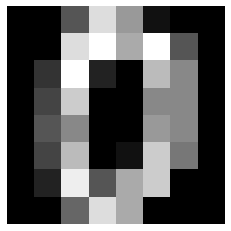

In [57]:
plt.imshow(load.data[0].reshape(8,8),cmap='gray')
plt.axis('off')
plt.show()

#  이미지 보기

In [58]:
load_data = load.data     # 피쳐 데이터 지정
print(load_data.shape)
# 데이터 정보에서 나온 첫번째인 data의 개수를 먼저 확인해보자(데이터의 수는 1797개고 64개의 정보를 가지고 있다)

(1797, 64)


In [59]:
load_label = load.target       # 라벨 데이터 지정
print(load_label)
# 두번째 정보인 target을 확인한다
# target은 정답이기 때문에 label로 변수를 지정해준다

[0 1 2 ... 8 9 8]


# 4. train,test 데이터 분리

데이터들을 수집했으니 모델을 학습시켜야 한다 
그전에 데이터를 훈련용과 테스트용을 쪼갠다

In [60]:
from sklearn.model_selection import train_test_split

X_train, X_test,y_train, y_test = train_test_split(load_data,load_label,test_size=0.2, random_state=7 ) 
X_train.shape, y_train.shape # 잘 나눠졌는지 체크



((1437, 64), (1437,))

- X_train, X_test,y_train, y_test = train_test_split(load_data,load_label,test_size=0.2, random_state=7 ) 
- 트레인 테스트 순서를 지키지 않아서 한시간을 날렸다 꼭 기억하자!

- https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html 학습링크

In [61]:
y_train, y_test # 문제와 정답들이 다 섞인걸 확인 할수있다 

(array([2, 2, 2, ..., 1, 3, 3]),
 array([6, 0, 5, 9, 2, 9, 0, 4, 1, 0, 1, 8, 2, 5, 2, 8, 1, 8, 9, 1, 0, 2,
        0, 4, 5, 3, 3, 0, 0, 4, 1, 4, 4, 4, 6, 1, 4, 0, 6, 6, 0, 9, 3, 6,
        6, 2, 0, 1, 9, 6, 2, 8, 9, 9, 0, 2, 0, 8, 4, 6, 8, 5, 8, 7, 8, 7,
        7, 4, 1, 4, 5, 5, 4, 6, 2, 0, 1, 3, 7, 5, 8, 2, 4, 4, 2, 5, 1, 9,
        3, 7, 6, 3, 3, 5, 6, 2, 1, 0, 1, 9, 4, 1, 1, 3, 1, 6, 9, 0, 3, 7,
        6, 9, 3, 8, 0, 8, 3, 8, 8, 6, 3, 7, 3, 9, 0, 3, 0, 9, 8, 1, 2, 2,
        3, 6, 9, 4, 0, 5, 4, 2, 9, 1, 0, 2, 5, 0, 2, 2, 7, 4, 6, 9, 8, 2,
        6, 0, 4, 4, 8, 5, 0, 2, 4, 6, 8, 2, 3, 7, 2, 9, 0, 3, 5, 9, 1, 6,
        8, 7, 5, 3, 0, 4, 2, 1, 3, 3, 6, 0, 2, 8, 4, 1, 4, 7, 5, 7, 6, 6,
        8, 1, 0, 6, 8, 7, 1, 1, 9, 8, 5, 5, 3, 6, 8, 1, 2, 0, 7, 5, 3, 0,
        8, 2, 0, 4, 0, 9, 4, 8, 4, 7, 9, 7, 3, 6, 2, 5, 1, 5, 9, 2, 9, 9,
        8, 2, 1, 6, 7, 1, 7, 5, 7, 8, 9, 5, 7, 4, 3, 7, 8, 8, 2, 8, 9, 5,
        3, 2, 8, 0, 4, 2, 1, 0, 8, 4, 1, 7, 1, 4, 7, 7, 1, 8, 3, 8, 4, 3,
     

훈련용과 테스트용을 나누고 순서를 섞었으니 이제 train을 모듈에 fit시키면 학습이 된다

In [62]:
X_train.shape

# 1437 개의 문제에 64개의 내용들이 들어있다(픽셀)

(1437, 64)

In [63]:
y_train.shape

# 위와 동일하게 1437개의 답이 준비되어있다

(1437,)

# 5. 다양한 모델로 학습시켜 보기

여러가지 학습 모델을 사용해 이런 분류 문제는 어느 알고리즘이 가장 적합한지 알아보는것 같다

1. Decision Tree 사용해 보기    
2. Random Forest 사용해 보기     
3. SVM 사용해 보기     
4. SGD Classifier 사용해 보기     
5. Logistic Regression 사용해 보기    

### Decision Tree 적용

In [64]:
from sklearn.tree import DecisionTreeClassifier   # 결정트리 학습모델 불러오기

decision_tree = DecisionTreeClassifier(random_state = 7)  # 변수지정
decision_tree.fit(X_train, y_train)                       # 학습

y_pred = decision_tree.predict(X_test)                    # 테스트 예측값 넣기

from sklearn.metrics import accuracy_score               # 정확도 메서드 가져오기

print(classification_report(y_test, y_pred))            #오차행렬을 사용해 정밀도 체크

accuracy = accuracy_score(y_test, y_pred)
accuracy
print('accuracy: ',accuracy)

              precision    recall  f1-score   support

           0       1.00      0.95      0.98        43
           1       0.75      0.79      0.77        42
           2       0.77      0.82      0.80        40
           3       0.84      0.91      0.87        34
           4       0.83      0.92      0.87        37
           5       0.90      0.96      0.93        28
           6       0.90      0.93      0.91        28
           7       0.90      0.82      0.86        33
           8       0.90      0.63      0.74        43
           9       0.74      0.81      0.78        32

    accuracy                           0.85       360
   macro avg       0.85      0.85      0.85       360
weighted avg       0.85      0.85      0.85       360

accuracy:  0.8472222222222222


단순한 알고리즘이라 정밀도가 낮은것 같다 

### RandomForest 사용하기

In [65]:
from sklearn.ensemble import RandomForestClassifier

X_train, X_test, y_train, y_test = train_test_split(load_data, load_label, test_size=0.2, random_state=21)
# 훈련용과 테스트용 분리
random_forest = RandomForestClassifier(random_state=32)           # 데이터 섞기
random_forest.fit(X_train, y_train)                               # 학습
y_pred = random_forest.predict(X_test)                            # 테스트

print(classification_report(y_test, y_pred))                      # 정밀도 출력

accuracy = accuracy_score(y_test, y_pred)
accuracy                         
print('accuracy: ',accuracy)                                      # 정확도 출력

              precision    recall  f1-score   support

           0       0.97      0.94      0.95        32
           1       0.97      1.00      0.99        36
           2       1.00      1.00      1.00        30
           3       0.98      0.98      0.98        41
           4       0.94      0.97      0.95        32
           5       1.00      0.98      0.99        46
           6       1.00      0.97      0.98        32
           7       0.98      1.00      0.99        40
           8       0.93      0.98      0.95        42
           9       1.00      0.93      0.96        29

    accuracy                           0.97       360
   macro avg       0.98      0.97      0.97       360
weighted avg       0.98      0.97      0.98       360

accuracy:  0.975


결정 트리를 여러개 겹쳐 좀 더 심도있게

### SVM 사용

In [66]:
from sklearn import svm
svm_model = svm.SVC()

X_train, X_test,y_train, y_test = train_test_split(load_data,load_label,test_size=0.2, random_state=7 ) 
# 훈련용, 테스트용 분리
svm_model.fit(X_train, y_train)   # 학습
y_pred = svm_model.predict(X_test)  # 테스트

print(classification_report(y_test,y_pred))   # 정밀도출력

accuracy = accuracy_score(y_test, y_pred)
accuracy
print('accuracy: ',accuracy)            #정확도 출력

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        43
           1       0.95      1.00      0.98        42
           2       1.00      1.00      1.00        40
           3       1.00      1.00      1.00        34
           4       1.00      1.00      1.00        37
           5       0.93      1.00      0.97        28
           6       1.00      1.00      1.00        28
           7       1.00      1.00      1.00        33
           8       1.00      0.93      0.96        43
           9       1.00      0.97      0.98        32

    accuracy                           0.99       360
   macro avg       0.99      0.99      0.99       360
weighted avg       0.99      0.99      0.99       360

accuracy:  0.9888888888888889


### SGD Classifier 사용

In [67]:
from sklearn.linear_model import SGDClassifier

X_train, X_test,y_train, y_test = train_test_split(load_data,load_label,test_size=0.2, random_state=7 )   # 훈련용, 테스트용 분리

sgd_model = SGDClassifier()      
sgd_model.fit(X_train,y_train)            # 모델 학습
y_pred = sgd_model.predict(X_test)        # 테스트

print(classification_report(y_test,y_pred))  # 정밀도 출력
accuracy = accuracy_score(y_test, y_pred)
accuracy
print('accuracy: ',accuracy)                 # 정확도 출력

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        43
           1       0.92      0.86      0.89        42
           2       0.97      0.97      0.97        40
           3       0.87      0.97      0.92        34
           4       1.00      0.97      0.99        37
           5       0.90      1.00      0.95        28
           6       0.93      0.93      0.93        28
           7       0.94      0.97      0.96        33
           8       0.90      0.88      0.89        43
           9       0.97      0.88      0.92        32

    accuracy                           0.94       360
   macro avg       0.94      0.94      0.94       360
weighted avg       0.94      0.94      0.94       360

accuracy:  0.9416666666666667


### 로지스틱스 회귀 모델 적용

In [68]:
from sklearn.linear_model import LogisticRegression    # 로지스틱스 회귀 불러오기

X_train, X_test,y_train, y_test = train_test_split(load_data,load_label,test_size=0.2, random_state=7 ) 

logistic_model = LogisticRegression(random_state = 7)  # 인스턴스 지정 및 난수돌림
logistic_model.fit(X_train, y_train)                   # 모델링 학습
# 로지스틱스 회귀 모델 적용 
y_pred = logistic_model.predict(X_test)               
# 학습된 모델에 test데이터 넣기

print(classification_report(y_test,y_pred))
# 테스트의 결과 출력
accuracy = accuracy_score(y_test, y_pred)
accuracy
print('accuracy: ',accuracy)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        43
           1       0.95      0.95      0.95        42
           2       0.98      1.00      0.99        40
           3       0.94      0.97      0.96        34
           4       0.97      1.00      0.99        37
           5       0.82      0.96      0.89        28
           6       1.00      0.96      0.98        28
           7       0.97      0.97      0.97        33
           8       0.92      0.81      0.86        43
           9       0.97      0.91      0.94        32

    accuracy                           0.95       360
   macro avg       0.95      0.95      0.95       360
weighted avg       0.95      0.95      0.95       360

accuracy:  0.9527777777777777


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


# 6. 결론

이 프로젝트의 목표는 0~ 9사이의 손글씨 이미지를 분석하는 모델을 만드는 것이다     

우선 sklearn에서 데이터셋을 불러온후 데이터를 분석한다     
문제의 수와 각 문제에 들어있는 데이터를 확인하고 정답지를 확인하는등 데이터를 분석하는 과정을 모두 마치면 train_test_split을 활용해 기존의 문제를 훈련용과 테스트용으로 나눈다      
 이러한 이유는 우리는 처음보는 문제에서도 잘풀수있는 범용적인 모델을 만들고 싶은데 기존의 데이터를 모두 학습시켰을때 현재 데이터에만 과하게 학습되어 처음보는 문제를 풀지 못하는 오류를 막기위해서 이다.   

 나눈 데이터를 학습시키기 전에 학습 모델을 선정한다 
 여기에서는 Decision Tree, Random Forest, SVM, SGD Classifier, Logistic Regression 로 총 5가지 학습모델을 각각 적용시킨후 정확도를 체크 하였다.     
84%의 Decision Tree를 제외한 나머지는 93~98%로 양호한 정확도를 보여주었다.

   



# 1-2 와인 분류하기

# 1. 필요한 모듈 가져오기

In [69]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# 2. 데이터 준비

In [70]:
wine = load_wine()  # 불러온 데이터셋 변수 지정

print(dir(wine))

['DESCR', 'data', 'feature_names', 'frame', 'target', 'target_names']


# 3. 데이터 이해하기

In [71]:
print(wine.keys())

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names'])


In [72]:
print(wine.DESCR)    # 전체적인 정보를 한번에 볼수 있다

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            1

In [73]:
print(wine.data.shape) # 173개의 문제와 각각의 문제에 13개의 데이터가 있다

(178, 13)


In [74]:
print(wine.feature_names)   # 13개 데이터의 각각의 이름 확인

['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']


In [75]:
print(wine.target)   # 답지 체크
print(wine.target_names)  # clas0~2까지 3중 하나가 답인 답지인걸 확인

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]
['class_0' 'class_1' 'class_2']


In [76]:
wine_data = wine.data
wine_label=wine.target

# 문제와 답지 정해주기

# 4. train, test 데이터 분리

In [77]:
X_train, X_test, y_train, y_test = train_test_split(wine_data, wine_label, test_size=0.2, random_state = 7)
print('X_train개수:', len(X_train),',X_test개수:',len(X_test))
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

# 학습용과 평가용으로 나눠서 섞어준다

X_train개수: 142 ,X_test개수: 36
(142, 13) (142,)
(36, 13) (36,)


# 5. 다양한 모델로 학습시켜 보기

## Decision Tree 적용

In [78]:
from sklearn.tree import DecisionTreeClassifier   # 결정트리 학습모델 불러오기

decision_tree = DecisionTreeClassifier(random_state = 7)  # 변수지정
decision_tree.fit(X_train, y_train)                       # 학습

y_pred = decision_tree.predict(X_test)                    # 테스트 예측값 넣기

from sklearn.metrics import accuracy_score               # 정확도 메서드 가져오기

print(classification_report(y_test, y_pred))

accuracy = accuracy_score(y_test, y_pred)
accuracy
print('accuracy: ',accuracy)

              precision    recall  f1-score   support

           0       0.88      1.00      0.93         7
           1       0.89      0.94      0.91        17
           2       1.00      0.83      0.91        12

    accuracy                           0.92        36
   macro avg       0.92      0.92      0.92        36
weighted avg       0.92      0.92      0.92        36

accuracy:  0.9166666666666666


## Random Forest 사용

In [79]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
X_train, X_test, y_train, y_test = train_test_split(wine_data, wine_label, test_size=0.2, random_state=21)

random_forest = RandomForestClassifier(random_state=32)
random_forest.fit(X_train, y_train)
y_pred = random_forest.predict(X_test)

print(classification_report(y_test, y_pred))

accuracy = accuracy_score(y_test, y_pred)
accuracy

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00        11

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36



1.0

## SVM 사용

In [80]:
from sklearn import svm
svm_model = svm.SVC()

svm_model.fit(X_train, y_train)
y_pred = svm_model.predict(X_test)

print(classification_report(y_test, y_pred))

accuracy = accuracy_score(y_test, y_pred)
accuracy

              precision    recall  f1-score   support

           0       0.86      0.80      0.83        15
           1       0.45      1.00      0.62        10
           2       0.00      0.00      0.00        11

    accuracy                           0.61        36
   macro avg       0.44      0.60      0.48        36
weighted avg       0.48      0.61      0.52        36



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.6111111111111112

SGD Classifier 사용

In [81]:
from sklearn.linear_model import SGDClassifier
sgd_model = SGDClassifier()

sgd_model.fit(X_train, y_train)
y_pred = sgd_model.predict(X_test)

print(classification_report(y_test,y_pred))

accuracy = accuracy_score(y_test, y_pred)
accuracy

              precision    recall  f1-score   support

           0       1.00      0.67      0.80        15
           1       0.45      0.50      0.48        10
           2       0.33      0.45      0.38        11

    accuracy                           0.56        36
   macro avg       0.60      0.54      0.55        36
weighted avg       0.64      0.56      0.58        36



0.5555555555555556

## Logistic Regression 사용

In [82]:
from sklearn.linear_model import LogisticRegression
logistic_model = LogisticRegression()

logistic_model.fit(X_train, y_train)
y_pred = logistic_model.predict(X_test)

print(classification_report(y_test,y_pred))

accuracy = accuracy_score(y_test, y_pred)
accuracy

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00        11

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36



/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


1.0

# 6. 결론

2번째 프로젝트는 와인분류모델링이다 앞의 프로젝트와 동일하게 데이터를 keys를 통해 변수들을 확인하고 데이터와 문제를 각각의 변수에 할당한다. 문제와 답을 훈련용과 테스트용으로 섞어서 나눠준다.
5가지 학습 모델을 이용해 학습을 시킨후 정확도를 체크한다. Random Forest, Logistic Regression이 오차없이 모든답을 다 맞추었고 Decision Tree는 91% 나머지 SVM, SGD 는 60%대로 낮은 정답율을 보여주었다.
Random Forest는 앙상블을 활용해 항상 높은 값을 가질것으로 예상되며 로지스틱 회귀는 확율을 근거로 추정하기 때문에 이러한 분류 모델에 적합한 것 같다 SVM과 SGD는 낮은 정확도를 보였는데 차트를 확인하니 class2를 하나도 맞추지 못했다

-----------------------------------------------------------------------------------------------------

# 1-3 유방암 여부를 진단해보자

# 1. 모듈불러오기

In [83]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.datasets import load_breast_cancer     # 데이터셋 가져오기
from sklearn.model_selection import train_test_split 
from sklearn.metrics import classification_report

# 2. 데이터 준비

In [84]:
cancer= load_breast_cancer()
print(dir(cancer))   # 어떤 변수와 메서드를 가지고 있는지 체크

['DESCR', 'data', 'data_module', 'feature_names', 'filename', 'frame', 'target', 'target_names']


# 3. 데이터의 정보확인

In [85]:
cancer.keys()    # 정보체크

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [86]:
print(cancer.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [87]:
cancer_data = cancer.data
print(cancer_data.shape)

# 569개의 데이터(문제)와 각각30개의 정보 담고있음

(569, 30)


In [88]:
print(cancer.feature_names) # 문제의 30개 데이터 이름들이다

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [89]:
print(cancer.target)   # 답지 체크
print(cancer.target_names) 
# 답지는 양성인지 음성인지 둘중 하나인것같다

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0
 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1
 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0
 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 1 0 0 1 1
 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 0 0 0 1 1
 1 1 0 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 0
 0 1 0 0 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 1 0 1 1 1 1 1 0 1 1
 0 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 0 1 0 1 1 0 

In [90]:
cancer_data = cancer.data
cancer_label = cancer.target
# 문제와 답지 지정

# 4. train, test 데이터 분리

In [91]:
X_train, X_test, y_train, y_test = train_test_split(cancer_data, cancer_label, test_size=0.2, random_state = 7)
print('X_train개수:', len(X_train),',X_test개수:',len(X_test))
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

# 데이터를 나눠준다

X_train개수: 455 ,X_test개수: 114
(455, 30) (455,)
(114, 30) (114,)


# 5. 다양한 모델로 학습시켜 보기

## Decision Tree 사용

In [92]:
from sklearn.tree import DecisionTreeClassifier

decision_tree = DecisionTreeClassifier(random_state=32)
print(decision_tree._estimator_type)

decision_tree.fit(X_train, y_train)

y_pred = decision_tree.predict(X_test)
print(classification_report(y_test, y_pred))

from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print('accuracy: ',accuracy)

classifier
              precision    recall  f1-score   support

           0       0.92      0.82      0.87        40
           1       0.91      0.96      0.93        74

    accuracy                           0.91       114
   macro avg       0.91      0.89      0.90       114
weighted avg       0.91      0.91      0.91       114

accuracy:  0.9122807017543859


## Random Forest 사용

In [93]:
from sklearn.ensemble import RandomForestClassifier

X_train, X_test, y_train, y_test = train_test_split(cancer_data, cancer_label, test_size=0.2, random_state=21)

random_forest = RandomForestClassifier(random_state=32)
random_forest.fit(X_train, y_train)
y_pred = random_forest.predict(X_test)

print(classification_report(y_test, y_pred))

accuracy = accuracy_score(y_test, y_pred)
print('accuracy: ',accuracy)

              precision    recall  f1-score   support

           0       0.97      0.95      0.96        39
           1       0.97      0.99      0.98        75

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114

accuracy:  0.9736842105263158


## SVM 사용

In [94]:
from sklearn import svm
svm_model = svm.SVC()

svm_model.fit(X_train, y_train)
y_pred = svm_model.predict(X_test)

print(classification_report(y_test, y_pred))

accuracy = accuracy_score(y_test, y_pred)
print('accuracy: ',accuracy)

              precision    recall  f1-score   support

           0       0.93      0.72      0.81        39
           1       0.87      0.97      0.92        75

    accuracy                           0.89       114
   macro avg       0.90      0.85      0.86       114
weighted avg       0.89      0.89      0.88       114

accuracy:  0.8859649122807017


## SGD Classifier 사용

In [95]:
from sklearn.linear_model import SGDClassifier
sgd_model = SGDClassifier()

sgd_model.fit(X_train, y_train)
y_pred = sgd_model.predict(X_test)

print(classification_report(y_test,y_pred))

accuracy = accuracy_score(y_test, y_pred)
print('accuracy: ',accuracy)

              precision    recall  f1-score   support

           0       0.66      0.95      0.78        39
           1       0.97      0.75      0.84        75

    accuracy                           0.82       114
   macro avg       0.81      0.85      0.81       114
weighted avg       0.86      0.82      0.82       114

accuracy:  0.8157894736842105


## Logistic Regression 사용

In [96]:
from sklearn.linear_model import LogisticRegression
logistic_model = LogisticRegression()

logistic_model.fit(X_train, y_train)
y_pred = logistic_model.predict(X_test)

print(classification_report(y_test,y_pred))

accuracy = accuracy_score(y_test, y_pred)
print('accuracy: ',accuracy)

              precision    recall  f1-score   support

           0       0.92      0.85      0.88        39
           1       0.92      0.96      0.94        75

    accuracy                           0.92       114
   macro avg       0.92      0.90      0.91       114
weighted avg       0.92      0.92      0.92       114

accuracy:  0.9210526315789473


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


# 6. 결론

이번 프로젝트는 여러 데이터를 통해 유방암인지 아닌지를 구별하는 모델링이다 이번엔 다른 프로젝트와 달리 각 문제안에 30개의 많은 데이터가 있으며 그 데이터를 통해 정답엔 0인지 1인지를 선택하는 방식이다. 데이터를 분석하고 훈련용과 테스트용으로 데이터를 나눈후 학습시킨다. 여러가지 모델들로 학습을 시키고 정확도를 체크한다.
이번 에는 RandomForest가 97%로 높은 수치를 보여주었고 나머지는 대부분 비슷한 수치를 보여주었다.

# 7. 회고

손글씨를 분류하는 모델링을 설계 해 보았다.  
첫번째 프로젝트라 머신러닝이 어떤과정인지 감을 잡는데 시간을 많이 쓴것같다.    
노드를 보기만 했을때와 실제로 타이핑을 하는것과 많이 다르다는 것을 알게 되었다.      
분명 노드를 볼때는 다 이해를 했다고 생각 했는데 막상 코드를 쳐보려니 어디서 부터 어떻게 손을 대야 할지 막막했다. 데이터를 불러오고 데이터를 확인하는 것 까진 순조로웠다. 데이터들을 확인하면서 어떤 특징이 있고 답안의 개수가 몇개인지 등등 왜 이러한 과정을 거치는지 이해 할 수있었다. 생각보다 모델을 훈련시키는 것이 간단한것에 놀랐다. 단지 fit 함수 하나로 학습이 되는게 놀라웠다.
문제는 어떤 학습모델을 사용해야 할지 선택하는 것인데 도저히 감을 못잡아서 그냥 시키는대로 5가지 모델을 다돌렸고 그 결과는 DecisionTree를 제외한 모든게 정확도 가 좋았다. 퍼실님들은 뭔가를 더 추가하거나 시각화 하는등을 추가하면 좋은 점수를 주실꺼라 하셨지만 지금 과정을 따라하는것도 벅차다. 다음에 좀 더 익숙해지면 배운것을 바탕으로 여러가지를 시도해 봐야겠다.

마지막 유방암 프로젝트는 양성을 음성으로 판단하면 안되기 때문에 이부분을 평가모델을 수정하거나 다른방법을 써보고 싶었으나 시간부족과 이해도의 부족으로 생각만하고 시도는 못한것같아 아쉽다.